# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Business Questions


1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

# Hipóteses

H1: Imóveis que possuem vista para água, são pelo menos 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis com porão possuem área total (sqrt_lot) 50% maiores do que os imóveis sem porão.

H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

H7: Imóveis variam 30% de média de preço por condição

H8: Imóveis variam 20% de média de preço por número de andares

H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

H10: Imóveis variam 5% ou mais o preço por nota de design, em média

# Data colect

<img src="dict.png" width="1000" height="800">

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [6]:
df.shape

(21613, 21)

In [7]:
dfna = df.dropna()
dfna.shape

(21613, 21)

Esse dataset não possui dados vazios!

In [8]:
df_num = df.drop(['id', 'date'], axis=1) 
df_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [9]:
df_min = pd.DataFrame(df_num.apply(np.min))
df_max = pd.DataFrame(df_num.apply(np.max))
df_range = pd.DataFrame(df_num.apply(lambda x: x.max() - x.min()))
df_median = pd.DataFrame(df_num.apply(np.median))
df_mean = pd.DataFrame(df_num.apply(np.mean))
df_std = pd.DataFrame(df_num.apply(np.std))

In [88]:
#Tabela de estatística descritiva
desc_stats = pd.concat([df_min, df_max, df_range, df_median, df_mean, df_std], axis=1)
desc_stats.columns = ['min', 'max', 'range', 'median', 'mean', 'std']
desc_stats

,min,max,range,median,mean,std
price,75000.00000,7700000.00000,7625000.00000,450000.00000,540088.14177,367118.70318
bedrooms,0.00000,33.00000,33.00000,3.00000,3.37084,0.93004
bathrooms,0.00000,8.00000,8.00000,2.25000,2.11476,0.77015
sqft_living,290.00000,13540.00000,13250.00000,1910.00000,2079.89974,918.41965
sqft_lot,520.00000,1651359.00000,1650839.00000,7618.00000,15106.96757,41419.55327
floors,1.00000,3.50000,2.50000,1.50000,1.49431,0.53998
waterfront,0.00000,1.00000,1.00000,0.00000,0.00754,0.08652
view,0.00000,4.00000,4.00000,0.00000,0.23430,0.76630
condition,1.00000,5.00000,4.00000,3.00000,3.40943,0.65073
grade,1.00000,13.00000,12.00000,7.00000,7.65687,1.17543


In [16]:
bed33 = df[df['bedrooms'] == 33]
bed33

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0,0,5,7,1040,580,1947,0,98103,47.68780,-122.33100,1330,4700


In [17]:
df_agrouped = df[['id', 'bedrooms']].groupby('bedrooms').count().sort_values('bedrooms').reset_index()
df_agrouped

,bedrooms,id
0,0,13
1,1,199
2,2,2760
3,3,9824
4,4,6882
5,5,1601
6,6,272
7,7,38
8,8,13
9,9,6


In [18]:
#Excluindo o imóvel com 33 quartos pois certamente ouve erro de digitação

df = df.drop(15870)

# Testando hipóteses

H1: Imóveis que possuem vista para água, são pelo menos 30% mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

H3: Imóveis com porão possuem área total (sqrt_lot) 50% maiores do que os imóveis sem porão.

H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

H7: Imóveis variam 30% de média de preço por condição

H8: Imóveis variam 20% de média de preço por número de andares

H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

H10: Imóveis variam 5% ou mais o preço por nota de design, em média

In [19]:
#H1: Imóveis que possuem vista para água, são pelo menos 30% mais caros, na média.

df_agrouped = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
df_agrouped

,waterfront,price
0,0,531558.54427
1,1,1661876.02454


Verdade

In [20]:
#H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

df_agrouped = df.loc[df['yr_built'] < 1955, 'price'].mean()
df_agrouped

537034.2033100763

In [21]:
df_agrouped = df.loc[df['yr_built'] >= 1955, 'price'].mean()
df_agrouped

541299.9684769241

Hipótese falsa.

In [22]:
#H3: Imóveis com porão possuem sqrt_lot 50% maiores do que os imóveis sem porão.

df_agrouped = df.loc[df['sqft_basement'] == 0, 'sqft_lot'].mean()
df_agrouped

16284.176824622886

In [23]:
df_agrouped = df.loc[df['sqft_basement'] != 0, 'sqft_lot'].mean()
df_agrouped

13287.153547018619

Hipótese falsa.

In [24]:
#H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

df_agrouped = df[['price', 'yr_built']].groupby('yr_built').mean().sort_values('yr_built').reset_index()
df_agrouped

,yr_built,price
0,1900,581387.20690
1,1901,556935.93103
2,1902,673007.40741
3,1903,480958.19565
4,1904,583756.64444
...,...,...
111,2011,544522.00000
112,2012,527447.33529
113,2013,678545.45274
114,2014,683681.75492


<AxesSubplot: xlabel='yr_built', ylabel='price'>

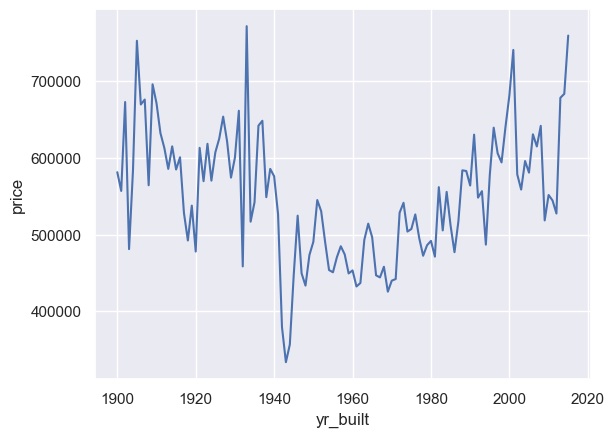

In [25]:
sns.set()
sns.lineplot(data=df_agrouped, x='yr_built', y='price')

Hipótese falsa.

In [26]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [27]:
#H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

df['month'] = df['date'].apply(lambda x: str(x)[5:7])

In [28]:
df_agrouped = df[['price', 'month']].groupby('month').mean().sort_values('month').reset_index()
df_agrouped

,month,price
0,01,525870.88957
1,02,507851.37120
2,03,543977.18720
3,04,561837.77499
4,05,550768.78583
5,06,557964.56861
6,07,544788.76436
7,08,536445.27680
8,09,529253.82187
9,10,539026.97178


<AxesSubplot: xlabel='month', ylabel='price'>

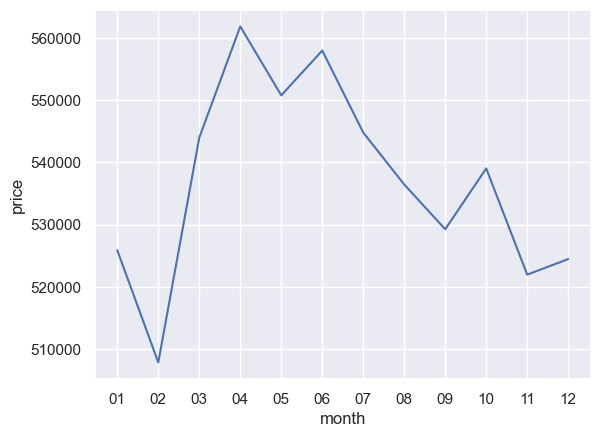

In [29]:
sns.lineplot(data=df_agrouped, x='month', y='price')

Hipótese falsa.

In [89]:
#H6: Imóveis renovados são em média 20% mais baratos que os imóveis construidos no mesmo ano

df_agrouped = df[['price', 'yr_renovated']].groupby('yr_renovated').mean().sort_values('yr_renovated').reset_index()
df_agrouped

,yr_renovated,price
0,0,530355.52106
1,1934,459950.00000
2,1940,378400.00000
3,1944,521000.00000
4,1945,398666.66667
...,...,...
65,2011,607496.15385
66,2012,625181.81818
67,2013,664663.51351
68,2014,654756.25275


In [90]:
df_agrouped1 = df.loc[(df['yr_built'] == 1934) | (df['yr_built'] >= 1940), ['price', 'yr_built']].groupby('yr_built').mean().sort_values('yr_built').reset_index()
df_agrouped1

,yr_built,price
0,1934,516771.42857
1,1940,576119.49359
2,1941,526612.01242
3,1942,379290.49776
4,1943,333373.47059
...,...,...
72,2011,544522.00000
73,2012,527447.33529
74,2013,678545.45274
75,2014,683681.75492


In [91]:
df_agrouped.columns = ['yr', 'price_r']
df_agrouped1.columns = ['yr', 'price_b']
df_agrouped = pd.merge(df_agrouped, df_agrouped1, on='yr', how='inner')
df_agrouped

,yr,price_x,price_y
0,1934,459950.00000,516771.42857
1,1940,378400.00000,576119.49359
2,1944,521000.00000,356322.07857
3,1945,398666.66667,447471.47368
4,1946,351137.50000,524640.52381
...,...,...,...
64,2011,607496.15385,544522.00000
65,2012,625181.81818,527447.33529
66,2013,664663.51351,678545.45274
67,2014,654756.25275,683681.75492


Hipótese falsa.

In [32]:
#H7: Imóveis variam pelo menos 30% de média de preço por condição

df_agrouped = df[['price', 'condition']].groupby('condition').mean().sort_values('condition').reset_index()
df_agrouped

,condition,price
0,1,334431.66667
1,2,327287.14535
2,3,542012.57815
3,4,521200.39003
4,5,612401.86471


Hipótese falsa.

In [33]:
#H8: Imóveis variam 20% de média de preço por número de andares

df_agrouped = df[['price', 'floors']].groupby('floors').mean().sort_values('floors').reset_index()
df_agrouped

,floors,price
0,1.00000,442162.10844
1,1.50000,558980.64293
2,2.00000,648891.16333
3,2.50000,1060346.49068
4,3.00000,582526.03915
5,3.50000,933312.50000


Hipótese falsa.

In [93]:
#H9: Imóveis com mais de 2 quartos são 70% mais caros que os que possuem apenas 1

df_agrouped = df.loc[:, ['price', 'bedrooms']].groupby('bedrooms').mean().sort_values('bedrooms').reset_index()
df_agrouped

,bedrooms,price
0,0,409503.84615
1,1,317642.88442
2,2,401372.68188
3,3,466232.07848
4,4,635419.50421
5,5,786599.82886
6,6,825520.63603
7,7,951184.65789
8,8,1105076.92308
9,9,893999.83333


Hipótese falsa.

In [35]:
#H10: Imóveis variam 4% ou mais o preço por nota de design, em média

df_agrouped = df[['price', 'grade']].groupby('grade').mean().sort_values('grade').reset_index()
df_agrouped

,grade,price
0,1,142000.00000
1,3,205666.66667
2,4,214381.03448
3,5,248523.97107
4,6,301919.63739
5,7,402563.82472
6,8,542852.76566
7,9,773513.18585
8,10,1071771.07407
9,11,1496841.72682


Hipótese verdadeira.

# Respondendo as perguntas de negócio

## Quais são os imóveis que a House Rocket deveria comprar e por qual preço?


In [66]:
from operator import index, indexOf
from sqlite3 import DatabaseError

df_agrouped = df[['zipcode', 'price']].groupby('zipcode').median().sort_values('price').reset_index()
df_agrouped


def buy(x):
    if x['condition'] > 3 and x['price'] < x['median_price']:
        return 'yes'
    else:
        return 'no'

df_filtrado = df.loc[:, ['id', 'zipcode', 'condition', 'price']]
df1 = pd.merge(df_filtrado, df_agrouped, on='zipcode', how='inner')          
df1.columns = ['id', 'zipcode', 'condition','price', 'median_price']

#mask_c = [df1['condition'] > 3]
#mask_p = [df1['price'] < df1['median_price']]
#df1['buy?'] = df1.apply(lambda x: 'yes' if [x['condition'] > 3] and [x['price'] < x['median_price']] else 'no')

df1['buy?'] = 0

for i in range(len(df1)):
    if df1.loc[i, 'condition'] > 3 and df1.loc[i, 'price'] < df1.loc[i, 'median_price']:
        df1.loc[i, 'buy?'] = 'yes'
    else:
        df1.loc[i, 'buy?'] = 'no'

df_compra = df1[df1['buy?'] == 'yes']
df_compra.loc[:,'percent_diff'] = ((df_compra.loc[:,'median_price'] - df_compra.loc[:,'price']) * 100/df_compra.loc[:,'price'])
df_compra = df_compra.drop('buy?', axis=1).sort_values('percent_diff', ascending=False).reset_index().drop('index', axis=1)
df_compra = df_compra.loc[df_compra['percent_diff'] >= 5, :]

df_compra

C:\Users\ROCKETZ\AppData\Local\Temp\ipykernel_15804\4226201855.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compra.loc[:,'percent_diff'] = ((df_compra.loc[:,'median_price'] - df_compra.loc[:,'price']) * 100/df_compra.loc[:,'price'])


,id,zipcode,condition,price,median_price,percent_diff
0,1238500451,98033,4,130000.00000,678350.00000,421.80769
1,2354300456,98027,4,130000.00000,570500.00000,338.84615
2,4239400300,98092,4,90000.00000,309780.00000,244.20000
3,5111400086,98038,5,110000.00000,342000.00000,210.90909
4,2202500080,98006,4,248000.00000,760184.50000,206.52601
...,...,...,...,...,...,...
3278,3331500485,98118,4,350000.00000,367500.00000,5.00000
3279,1604600660,98118,4,350000.00000,367500.00000,5.00000
3280,3908100020,98115,5,540000.00000,567000.00000,5.00000
3281,2113701080,98106,5,300000.00000,315000.00000,5.00000


## Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

In [37]:
#H7: Imóveis variam pelo menos 30% de média de preço por condição

df_agrouped = df[['price', 'condition']].groupby('condition').mean().sort_values('condition').reset_index()
df_agrouped

,condition,price
0,1,334431.66667
1,2,327287.14535
2,3,542012.57815
3,4,521200.39003
4,5,612401.86471


In [38]:
percentual = df_agrouped.loc[4, 'price'] * 100/df_agrouped.loc[3, 'price']
percentual

117.49835119397578

Graças a H7, foi possível observar que o preço médio dos imóveis aumenta ~17.5% com a variação da condição 4 -> 5. Sendo assim, é aceitável fazer um acréscimo de 15% no valor de venda se o imóvel tiver na melhor condição.

In [39]:
def season(month):
    month = int(month)
    if month <= 2 or month == 12:
        return 'Winter'
    elif 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(lambda x: season(x))

df_s = df[['date', 'season']]

df_s.sample(10)

,date,season
20170,2014-05-19,Spring
12380,2015-03-27,Spring
11525,2014-06-10,Summer
12798,2015-02-02,Winter
10916,2014-09-09,Fall
7631,2014-08-12,Summer
18816,2014-11-10,Fall
20464,2014-07-29,Summer
3187,2015-01-30,Winter
20692,2015-04-24,Spring


In [76]:
df_agrouped = df[['zipcode', 'season', 'price']].groupby(['zipcode', 'season']).median().sort_values('zipcode').reset_index()
df_agrouped = df_agrouped.rename(columns={'price':'season_median_price'})
df_agrouped

,zipcode,season,season_median_price
0,98001,Fall,249900.00000
1,98001,Spring,262000.00000
2,98001,Summer,262500.00000
3,98001,Winter,260000.00000
4,98002,Fall,235000.00000
...,...,...,...
275,98198,Spring,265000.00000
276,98199,Spring,709000.00000
277,98199,Summer,730000.00000
278,98199,Fall,650000.00000


In [79]:
'''zipcodes_list = list(df['zipcode'].unique())
zipcodes_list

df_agrouped['best_price'] = 0
df_agrouped['best_season'] = 0

for i in zipcodes_list:
    df_zip = df_agrouped.loc[df_agrouped['zipcode'] == i, :]
    df_agrouped.loc[df_agrouped['zipcode'] == i, ['best_price']] = int(df_zip['season_median_price'].max())
    df.loc[df['zipcode'] == i, ['best_price']] = int(df_zip['season_median_price'].max())

    df_zipcode = df_agrouped.loc[df_agrouped['zipcode'] == i, :]
    
    for index, row in df_zipcode.iterrows():
        if row['season_median_price'] == row['best_price']:
            df_zipcode['best_season'] = row['season']
        df_agrouped.loc[df_agrouped['zipcode'] == i, ['best_season']] = df_zipcode['best_season']

df_agrouped''';

In [44]:
zipcodes_list = list(df['zipcode'].unique())
zipcodes_list

row_list = []

for i in zipcodes_list:
    df_zipcode = df_agrouped.loc[df_agrouped['zipcode'] == i, :]
    
    for index, row in df_zipcode.iterrows():
        if row['season_median_price'] == int(df_zipcode['season_median_price'].max()):
            row_list.append(row)
        
df_agp = pd.DataFrame(row_list)
df_agp.columns = ['zipcode', 'best_season', 'best_median_price']
df_agp.sort_values('zipcode')

,zipcode,best_season,best_median_price
2,98001,Summer,262500.00000
7,98002,Winter,238000.00000
11,98003,Spring,277500.00000
13,98004,Spring,1210000.00000
18,98005,Fall,813000.00000
...,...,...,...
263,98177,Fall,574750.00000
264,98178,Fall,290500.00000
269,98188,Fall,270000.00000
273,98198,Winter,267475.00000


In [43]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,10,Fall
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,12,Winter
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,02,Winter
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,12,Winter
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,02,Winter


Só resta criar um df com as colunas principais e alterar a porcentagem de lucro pela sazonalidade e condição

In [51]:
df_entrega = df[['id', 'zipcode', 'condition', 'season', 'price']]
df_entrega


,id,zipcode,condition,season,price
0,7129300520,98178,3,Fall,221900.00000
1,6414100192,98125,3,Winter,538000.00000
2,5631500400,98028,3,Winter,180000.00000
3,2487200875,98136,5,Winter,604000.00000
4,1954400510,98074,3,Winter,510000.00000
...,...,...,...,...,...
21608,263000018,98103,3,Spring,360000.00000
21609,6600060120,98146,3,Winter,400000.00000
21610,1523300141,98144,3,Summer,402101.00000
21611,291310100,98027,3,Winter,400000.00000


In [82]:
df_final = pd.merge(df_entrega, df_agp, on='zipcode', how='inner')
df_final

,id,zipcode,condition,season,price,best_season,best_median_price
0,7129300520,98178,3,Fall,221900.00000,Fall,290500.00000
1,4060000240,98178,4,Summer,205425.00000,Fall,290500.00000
2,4058801670,98178,3,Summer,445000.00000,Fall,290500.00000
3,2976800796,98178,3,Fall,236000.00000,Fall,290500.00000
4,6874200960,98178,3,Winter,170000.00000,Fall,290500.00000
...,...,...,...,...,...,...,...
21510,2525049086,98039,4,Fall,2720000.00000,Fall,2450000.00000
21511,2525049113,98039,4,Summer,1950000.00000,Fall,2450000.00000
21512,3262300485,98039,3,Spring,2250000.00000,Fall,2450000.00000
21513,6447300365,98039,3,Fall,2900000.00000,Fall,2450000.00000


In [85]:
def selling_price(x):
    if x['best_median_price'] > x['price']:
        price = x['price'] + (x['price']*30/100)
        if x['condition'] == 5:
            price = price + price*15/100
    else:
        price = x['price'] + (x['price']*10/100)

    return price

df_final['selling_price'] = df_final.apply(lambda x: selling_price(x), axis = 1)
df_final['profit'] = df_final.apply(lambda x: x['selling_price'] - x['price'], axis = 1)

df_final

,id,zipcode,condition,season,price,best_season,best_median_price,selling_price,profit
0,7129300520,98178,3,Fall,221900.00000,Fall,290500.00000,288470.00000,66570.00000
1,4060000240,98178,4,Summer,205425.00000,Fall,290500.00000,267052.50000,61627.50000
2,4058801670,98178,3,Summer,445000.00000,Fall,290500.00000,489500.00000,44500.00000
3,2976800796,98178,3,Fall,236000.00000,Fall,290500.00000,306800.00000,70800.00000
4,6874200960,98178,3,Winter,170000.00000,Fall,290500.00000,221000.00000,51000.00000
...,...,...,...,...,...,...,...,...,...
21510,2525049086,98039,4,Fall,2720000.00000,Fall,2450000.00000,2992000.00000,272000.00000
21511,2525049113,98039,4,Summer,1950000.00000,Fall,2450000.00000,2535000.00000,585000.00000
21512,3262300485,98039,3,Spring,2250000.00000,Fall,2450000.00000,2925000.00000,675000.00000
21513,6447300365,98039,3,Fall,2900000.00000,Fall,2450000.00000,3190000.00000,290000.00000
